Lecture 1 -- Introduction to Optimization
======================

Notes by Luca Mariot

Covered topics:
* Basic definition on optimization problems and their breeds
* First examples of single-state optimization algorithms: gradient descent, hill-climbing
* A more refined single-state method: Simulated Annealing

References:

* Thomas Weise, *Global Optimization Algorithms -- Theory and Application*
* Sean Luke, *Essentials of Metaheuristics*

Basic Definitions
--------------------

### What is Optimization?
Optimization can be broadly defined as the process of searching for a best solution to a particular problem. Of course, depending on the context the meaning of "best" can vary greatly. In the case of optimization involved in natural phenomena, a "best solution" can be regarded, for instance, as the optimal state of a physical system. Two concrete examples of optimization processes found in nature are the following:

* In chemical bonds, the optimal state is the one that minimizes the potential energy of the electrons shared between two atoms, so to create a stable bond.
* In evolutionary biology, natural selection (or "survival of the fittest") leads species towards a better adaptation for the environment where they live. In particular, an optimal state is a well-adapted species with a stable reproductive success.

The main feature that sets apart optimization involved in natural phenomena from optimization in artificial systems is the *purpose*: while optimization in natural systems is "blind" and derives from the physical laws that govern our universe, optimization in artificial systems is driven by a purpose, which is typically the intention of a human designer who wants to solve a particular problem. In what follows, we will mainly focus on optimization problems concerning artificial systems. Examples concern for example economy, where one often aims at maximixing the profit while minimizing the costs. To make another example in the medical domain, one applies a particular therapy to a patient in order to treat a pathological condition while minimizing the side effects on the patient's organism.

In general, we can observe that an optimization problem is characterized by one or more *optimization criteria* (or *objectives*), which often induce a trade-off among them. Moreover, one can typically evaluate how good a particular solution is in solving an optimization problem by measuring how it satisfies the various criteria.

### Definitions and First Examples

We start our study of optimization problems by focusing first on the simplest case, i.e. when a problem is described by a single optimization objective, or when several objectives are combined into one. Later in the course we will also deal with the multi-objective approach. 

#### Definition 1
An *single-objective optimization problem* is a function $\mathcal{P}: \mathcal{I} \rightarrow \mathcal{S}$ mapping each *problem instance* $I \in \mathcal{I}$ to a *space of candidate solutions* $S = \mathcal{P}(I) \in \mathcal{S}$, where $S$ is equipped with an *objective function* $f: S \rightarrow \mathbb{R}$ which measures how good a candidate solution $x \in S$ is in solving the instance $I$ of $\mathcal{P}$. In particular, $\mathcal{P}$ is a *maximization* problem when the *global optimum* for $\mathcal{P}$ is a solution $x^* \in S$ is defined as 

$$ x^* = \textrm{argmax}_{x \in S} \{ f(x) \} \enspace .$$

On the other hand, $\mathcal{P}$ is a *minimization* problem when $x^* \in S$ is defined as

$$ x^* = \textrm{argmin}_{x \in S} \{ f(x) \} \enspace .$$

Depending on the nature of the candidate solutions spaces, we can classify optimization problems in two broad classes:

* *Numerical* (or *continuous*) *optimization problems*: for each problem instance $I \in \mathcal{I}$, the corresponding solutions space $S=\mathcal{P}(I)$ is a subset of the $n$-dimensional Euclidean space, i.e. $S \subseteq \mathbb{R}^n$.
* *Combinatorial optimization problems*: in this case, each problem instance $I$ maps to a *finite* set $S$.

One can also have "intermediate" classes such as *integer programming optimization problems* (where the candidate solutions set is a lattice such as $\mathbb{Z}^n$) or *mixed integer programming optimization problems* (where some of the variables of the candidate solutions are defined over a continuous space while others on a finite set). In this lecture, however, we will mainly deal with numerical and combinatorial optimization problems.

Remark that in Definition 1 we called $x^*$ as the *global* optimum of problem $\mathcal{P}$, since it ranges over all possible candidate solutions in $S$. Most optimization problems, however, are characterized also by the presence of *local* optima, which can be intuitively considered as the best solution to the optimization problem when we restrict our attention only to a subset of *neighboring* solutions in the space $S$. This implies that the candidate solution space $S$ is endowed with a *distance*, that allows us to give a precise meaning to the concept of neighborhood. Formally, we give the following definition of local optimum:

#### Definition 2
Let $S = \mathcal{P}(I)$ be the space of candidate solutions to instance $I$ of an optimization problem $\mathcal{P}$, and assume that $S$ is equipped with an objective function $f: S \rightarrow \mathbb{R}$ and a distance $d_S : S \times S \rightarrow \mathbb{R}^+$. The *neighborhood* of a candidate solution $x \in S$ of radius $r > 0$ is the set of solutions $N_{x,r}$ defined as

$$ N_{x,r} = \{y \in S: d_S(x,y) \le r\} \enspace .$$

Given $r$, a candidate solution $x^L \in S$ is called a *local optimum* for a maximization problem if $f(x) \le f(x^L)$ for all solutions $x \in N_{x^L,r}$. Likewise, in a minimization problem $x^L$ is a local optimum if $f(x) \ge f(x^L)$ for all solutions $x \in N_{x^L,r}$.

Clearly, one usually wants to avoid obtaining candidate solutions that are only locally optimal, since they may not correspond to the global optima attainable over the whole set $S$. We will see in this course that "getting stuck into local optima" is one of the most common issues encountered when designing optimization algorithms.

As a last introductory definition, we introduce the concept of *fitness landscape*:

#### Definition 3
Let $S = \mathcal{P}(I)$ be the space of candidate solutions to instance $I$ of an optimization problem $\mathcal{P}$, and let $f: S \rightarrow \mathbb{R}$ be the associated objective function. The *fitness landscape* of $S$ is the graph of the function $f$, i.e. $L = \{(x,y) \in S\times \mathbb{R}: y = f(x) \}$.

The fitness landscape can be used to give a visual idea of the structure of the optimization problem, with the location of the local and global optima, and how "smoothly" the candidate solutions are connected to each other with respect to the objective function.

We now introduce some "toy" examples for both kinds of problems.

#### Example 1: Sphere function
The sphere function is a numerical optimization problem defined as follows:

* Set of instances: $\mathcal{I} = \mathbb{N}$.
* Family of solution spaces: $\mathcal{S} = \{\mathbb{R}^n : n \in \mathbb{N} \}$.
* Optimization problem: $\mathcal{P}(n) = \mathbb{R}^n$, for all $n \in \mathbb{N}$.
* Objective function: $f: \mathbb{R}^n \rightarrow \mathbb{R}$, defined as $f(x) = \sum_{i=1}^n x_i^2$, for all $x \in \mathbb{R}^n$
* Optimization objective: *minimization*.
* Optimal solution: $x^* = (0, 0, \cdots, 0)$.

The code graph below depicts the fitness landscape for the sphere function under the instance $I = 2$:

<IPython.core.display.Javascript object>


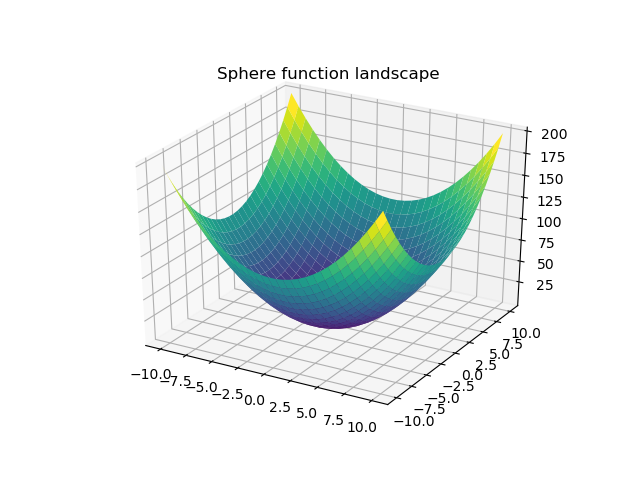

In [1]:
from mpl_toolkits import mplot3d

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (x ** 2 + y ** 2)

x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Sphere function landscape');

One can visualize, in particular, that the sphere function is characterized by a "smooth" landscape, with a single global optimum. We call such optimization problems *unimodal*.

#### Example 2: OneMax
The OneMax problem is a combinatorial optimization problem which basically amounts to maximizing the number of ones in a binary string. Its simplicity allows one to study the convergence of several optimization algorithms, some of which will addressed in the next lectures. Formally, OneMax is defined as follows:

* Set of instances: $\mathcal{I} = \mathbb{N}$.
* Family of solution spaces: $\mathcal{S} = \{\mathbb{B}^n : n \in \mathbb{N} \}$, where $\mathbb{B}^n = \{0,1\}^n$.
* Optimization problem: $\mathcal{P}(n) = \mathbb{B}^n$, for all $n \in \mathbb{N}$.
* Objective function: $f: \mathbb{B}^n \rightarrow \mathbb{R}$, defined as $f(x) = \sum_{i=1}^n x_i$, for all $x \in \mathbb{B}^n$
* Optimization objective: *maximization*.
* Optimal solution: $x^* = (1, 1, \cdots, 1)$.

The code graph below depicts the fitness landscape for the instance $I=4$:

<IPython.core.display.Javascript object>


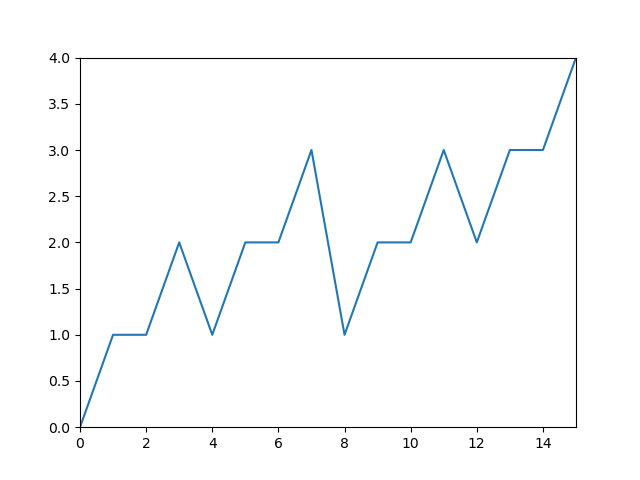

In [2]:
def f(x):
    obj = 0
    for i in range(len(x)):
        obj += x[i]
    return obj

def enumGraphPairs(n):
    x = []
    y = []
    
    for i in range(2**n):
        x.append(i)
        binx = [int(z) for z in list('{0:0b}'.format(i))] # convert i in a binary list
        y.append(f(binx))
    
    return [x,y]

n=4                        #Instance of problem I
graph = enumGraphPairs(n)
fig = plt.figure()
plt.plot(graph[0], graph[1])
plt.axis([0, 2**n-1, 0, n])
plt.show()

In this case, by increasing the value of $n$ we can see that the fitness landscape is characterized by more and more local optima. However, the landscape is still unimodal, since there is only one global optimum (the string with all 1s in it).

#### Example 3: BinInt
The BinInt problem is a combinatorial optimization problem similar to OneMax, with the exception that the contributions of the bits in a binary string are exponentially scaled. The formal definition is as follows:

* Set of instances: $\mathcal{I} = \mathbb{N}$.
* Family of solution spaces: $\mathcal{S} = \{\mathbb{B}^n : n \in \mathbb{N} \}$.
* Optimization problem: $\mathcal{P}(n) = \mathbb{B}^n$, for all $n \in \mathbb{N}$.
* Objective function: $f: \mathbb{B}^n \rightarrow \mathbb{R}$, defined as $f(x) = \sum_{i=1}^n x_i\cdot 2^{i-1}$, for all $x \in \mathbb{B}^n$
* Optimization objective: *maximization*.
* Optimal solution: $x^* = (1, 1, \cdots, 1)$.

The code graph below depicts the fitness landscape for the instance I=4:

In [ ]:
def f(x):
    obj = 0
    for i in range(len(x)):
        obj += x[i]*(2**i)
    return obj

def enumGraphPairs(n):
    x = []
    y = []
    
    for i in range(2**n):
        x.append(i)
        binx = [int(z) for z in list('{0:0b}'.format(i))] # convert i in a binary list
        y.append(f(binx))
    
    return [x,y]

n=4                        #Instance of problem I
graph = enumGraphPairs(n)
fig = plt.figure()
plt.plot(graph[0], graph[1])
plt.axis([0, 2**n-1, 0, 2**n])
plt.show()

The problem is clearly still unimodal since it is just an exponential scaled version of OneMax, but by increasing the problem instance the fitness landscape becomes even more "rugged" than the OneMax landscape.


Optimization Algorithms
---------------------------

### Defining Optimization Algorithms
So far, we gave a formal definition of single-objective optimization problems and got under our belt a few examples of these problems. In all cases, the optimal solution is already clear from the definition of the objective function. Our aim is however to introduce optimization algorithms in a general setting so that they can be applied both to "easy" problems (which we can use to drive our intuition of the inner working of an algorithm), and to "difficult" problems (where maybe the optimal solution is still not even known in the literature).

We start by first giving a more precise definition of the *setup* of an optimization problem:

#### Definition 4
Let $\mathcal{P}: \mathcal{I} \rightarrow \mathcal{S}$ be an optimization problem. A *setup* for a problem instance $I \in \mathcal{I}$ and solution space $S=\mathcal{P}(I)$ is a quadruple $OptSet = \langle \mathbb{G}, Op, dec, \Theta \rangle$ where:

* $\mathbb{G}$ is a *search space* (or *genotype space*)
* $Op$ is a set of *variation operators*. In particular, each element $v \in Op$ is a function $v: \mathbb{G}^n \rightarrow \mathbb{G}$ for a certain $n \in \mathbb{N}$, which takes in input $n$ genotypes and returns in output another genotype.
* $dec: G \rightarrow S$ is a *decoder function* which maps each genotype $g \in \mathbb{G}$ to a candidate solution $x \in S$ (which in this context is also called a *phenotype*)
* $\Theta$ is a set of *configuration parameters*, which specifies constraints for solving the optimization problem (such as the maximum number of evaluations allowed for the objective function $f$).

It may seem an unnecessary complication to introduce the setup of an optimization problem. After all, one could just work directly with the candidate solutions in $S$, without going into the trouble of specifying a genotype space, a set of variation operators and a decoding map between genotypes and phenotypes. However, we will see that this structure is useful for developing optimization algorithms which are *robust*, i.e. that can be applied to a wide range of optimization problems.

We can now give the formal definition of optimization algorithm:

#### Definition 5
An optimization algorithm is a function $OptAlg: OptSetup \rightarrow X^*$ is a function which maps the setup $OptSetup = \langle \mathbb{G}, Op, dec, \Theta \rangle$ of an optimization problem  $\mathcal{P}: \mathcal{I} \rightarrow \mathcal{S}$ to a subset of solutions $X^*$ of the solution space $S$. In particular, $OptAlg$ uses a subset $searchOp \subseteq Op$ of the variation operators in $OptSetup$, and it satisfies the configuration parameters in $\Theta$ in producing the output $x^* \in X^*$.

Remark that we want $OptAlg$ to be an *algorithm*, that is, a finite sequence of well-defined operations that takes the description of an input and produces an output. This means, in particular, that the variation operators in $searchOp$ must be in their turn expressible as algorithms.

The general structure of an optimization algorithm is usually *iterative*, meaning that it starts from the genotype of an initial solution (or a set of initial solutions, as we will see later in this course), and successively *tweaks* it by using the variation operators in $searchOp$. At each step, the search is guided by evaluating the objective function on the modified solutions. Moreover, the algorithm is performed by satisfying the configuration parameters in $\Theta$, which, at the bare minimum, includes the way how the initial solution is generated and the *termination criteria*, which tells the algorithm when to stop.

The pseudocode below illustrates the skeleton structure of an optimization algorithm, which will recur often in the next lectures:

```
procedure iterOptAlg(OptSet)
    x := generateInitSol()
    obj := evaluateObjective(dec(x))
    
    while NOT(terminationCriteria()) do
        x := tweak(x)
        obj := evaluateObjective(dec(x))
    endwhile
    
    return (dec(x), obj)
```

Clearly, the "magic" of all optimization algorithms lies in the tweak operation that is iteratively applied to produce the genotype of a new candidate solution starting from the current one. After meeting the termination criteria, the candidate solution corresponding to the last genotype produced is returned to the user, along with its objective function value.

### A first example of optimization algorithm: Gradient Descent

We will now delve into our first concrete example of optimization algorithm, namely *gradient descent*. The general idea that we are adopting, in this case, is to exploit knowledge of a specific optimization problem to guide the search of an optimal solution. 

Consider the sphere function of Example 1. The objective function was defined as:

$$ f(x) = \sum_{i=1}^n x_i^2 \enspace ,$$

with the optimization objective of minimizing $f$. This function is *differentiable*, hence for any possible candidate solution $x \in \mathbb{R}^n$ we can compute the gradient vector $\nabla(f)(x)$, which gives us information about the direction where the function increases. The idea of gradient descent is to iteratively modify the initial solution by *subtracting* to it the gradient multiplied by a small weight, so that we are going in the direction where the objective function decreases. In other words, the tweak operation is defined as

$$ x \leftarrow x - \alpha \nabla(f)(x) \enspace ,$$

where $\alpha \in (0,1)$ is called the *step* of the descent. Of course, if the function is to be maximized, one could straightforwardly define a *gradient ascent* method which adds a weighted gradient instead of subtracting it.

When do we know that the solution found is optimal? By Fermat's theorem, we know that the minima and maxima of differentiable functions occur at points where the gradient vanishes. Hence, a good termination criterion could be to stop whenever the gradient evaluated at a certain point is zero *or* when a certain number of objective function evaluations has been performed. The initial solution $x_0$, on the other hand, could be either generated randomly in a certain interval or initialized to a fixed point.

To make our discussion more concrete, let us consider the following optimization setup $OptSet = \langle \mathbb{G}, Op, dec, \Theta \rangle$ for the sphere function applied to the instance $I = 5$ and solution space $S = \mathbb{R}^5$:

* The genotype space $\mathbb{G}$ is the set of all 5-dimensional vectors of floating-point numbers, under a certain representation (e.g. IEEE 754).
* $Op$ includes all transformations that can be performed on floating-point numbers, which again depends on the specific representation adopted.
* $dec$ maps a binary string to the corresponding 5-dimensional (rational) vector under the adopted representation.
* $\Theta$ specifies the generation of the initial solution as a random sampling of a 5-dimensional vector $x_i$ where each component is bounded in the interval $[-10, 10]$, and the termination criterion as $\nabla(f)(x)=0$ or the maximum number of objective functions evaluations $\tau$ has been reached.

The pseudocode of the gradient descent optimization algorithm can thus be expressed as follows. For simplicity, we avoid specifying the decoding operation and consider directly the variable $x$ for both the phenotype and the genotype.

```
procedure gradientDescent(OptSet)
    x := generateRandomSol(-10, 10)
    obj := f(x)
    g := gradient(f, x)
    i := 0
    
    while (g!=0 AND i < tau) do
        x := x - alpha * g
        obj := f(x)
        g := gradient(f, x)
        i : = i+1
    endwhile
    
    return (x, obj)
```

Below we provide a Python implementation of gradientDescent for this particular optimization setup of the sphere function:

In [5]:
### Example of heuristic numerical optimization algorithm: Gradient descent over sphere function

import random

### Functions definitions
def evaluateSphere(x):
    objective = 0.0
    for i in range(len(x)):
        objective += x[i]**2
    return objective

def evaluateGradient(x):
    g = []
    for i in range(len(x)):
        g.append(2*x[i])
    return g

def checkGradient(g):
    for i in range(len(g)):
        if(g[i] != 0):
            return False
    return True

def updateSolution(x, alpha):
    g = evaluateGradient(x)
    for i in range(len(x)):
        x[i] = x[i] - alpha*g[i]
    return x

### Main

# Generate initial solution at random and evaluate the objective function on it
x = []
for i in range(5):
    x.append(random.uniform(-10,10))

obj = evaluateSphere(x)
print("The initial random solution is ", x)
print("Objective function: ", obj)

g = evaluateGradient(x)     #gradient vector for candidate solution x
i = 1                       #objective function evaluations counter
alpha = 0.1                 #step of the gradient descent
tau = 100                   #number of maximum objective function evaluations

# Main loop
while((not(checkGradient(g))) and (i<tau)):
    x = updateSolution(x, alpha)
    obj = evaluateSphere(x)
    g = evaluateGradient(x)
    i += 1

print("The final solution is ", x)
print("Objective function: ", obj)
print("Number of objective function evaluations: ", i)

The initial random solution is  [3.289439333729172, 2.055398099516257, -2.482631661078014, 8.914970060045896, -9.921651613989688]
Objective function:  199.12439436326554
The final solution is  [8.375882830970081e-10, 5.233649843005181e-10, -6.3215125120037e-10, 2.270014342532289e-09, -2.526345160294265e-09]
Objective function:  1.2910465227412025e-17
Number of objective function evaluations:  100


#### Exercise 1
Try to modify the parameters of the gradient descent program above, and observe how its behavior changes. How are the step $\alpha$ and the maximum number of evaluations $\tau$ related to each other? Can we determine a value of $\alpha$ for which the algorithm returns the optimal solution $x^* = (0, 0, 0, 0, 0)$ after one step of the while loop? What does it happen if we take too a large step $\alpha$?

### Hill-climbing
Gradient descent is a simple enough algorithm, but as we remarked above, it crucially depends on the fact that the objective function is *differentiable*, as in the sphere function case. In other words, we exploited knowledge related to the specific domain of the optimization problem. Optimization algorithms that leverage the properties of an optimization algorithm are also called *heuristics*, and they work typically on rather narrow class of optimization problems. In the case of gradient descent, this class is the set of optimization problems whose objective functions are in the class $C^1$ i.e., once differentiable.

What if, on the other hand, we want to develop an optimization algorithm that can be applied on different classes of problems, that is, a *metaheuristic*? Clearly, this means avoiding the use of problem-specific knowledge, in order to make the optimization algorithm the most general possible. Looking at the pseudocode of the $iterOptAlg()$ procedure that we sketched above, the bare minimum that we must use to perform an iterative optimization algorithm is the evaluation of the objective function. Hence, we broadly define a *metaheuristic* as an optimization algorithm that exploits only the information obtained by the objective function on a candidate solution to drive the optimization problem.

A first attempt to define a general metaheuristic, especially in combinatorial optimization problem, is an *exhaustive enumeration* procedure. Assuming that the candidate solutions in the finite set $S$ are totally ordered as $x_1, \cdots x_N$ with $N = |S|$, and there exists an enumeration algorithm that allows to generate all of them with respect to this order, the idea is to simply initialize the current to solution to $x_1$ and evaluate its objective function value. Then, generate $x_2$, and if the objective function value on $x_2$ is higher (for a maximization problem), then update the current solution to $x_2$. And so on, until we reach $x_N$.

Clearly, the problem with this approach (as well as with optimization approaches based on enumeration, such as *dynamic programming*) is that as soon as the candidate solutions space gets too big, exhaustive enumeration becomes unfeasible. Consider for example the OneMax problem with $n=256$. This would require to enumerate all $2^{256} \approx 1.16\cdot 10^{77}$ binary strings of $256$ bits, which is approximately of the same order of magnitude of the number of hyrogen atoms in the observable universe!

A more refined method would be to use a surrogate notion of "gradient", that is, based only the value of the objective function, and then apply the same algorithmic structure used for gradient descent. This is the idea underlying *Hill-Climbing*, which assumes that a distance $d_{\mathbb{G}}$ is defined over the genotype space. This distance is used to randomly sample the genotype of a candidate solution in a *neighborhood* of the current solution. If the objective function evaluated on this new solution is better, then it becomes the new current solution.

As a concrete example, consider the OneMax problem with the optimization setup $OptSet = \langle \mathbb{G}, Op, dec, \Theta \rangle$ for the the instance $I = n$ and solution space $S = \mathbb{B}^n$:

* The genotype space $\mathbb{G}$ equals the candidate solution space, i.e. $\mathbb{G} = \mathbb{B}^n$. Hence, the decoding function $dec$ is the identity. Moreover, we assume that $\mathbb{B}^n$ is endowed with the *Hamming distance*.
* $Op$ is the set of operators that includes, for all $i \in \{1,\cdots, n\}$, all the transformations that complement exactly $i$ bits.
* $\Theta$ specifies the generation of the initial solution as a random sampling of a n-dimensional binary vector $x \in \mathbb{B}^n$, and the termination criterion as $obj(x) = 2^n-1$ or the maximum number of objective functions evaluations $\tau$ has been reached.

Below is reported the pseudocode for the Hill-Climbing procedure over the OneMax problem, when we limit the subset $searchOp \subseteq Op$ to the set of all transformations that complement exactly *one* bit. This actually means considering the neighborhood composed of all genotypes of candidate solutions which lie at Hamming distance $1$ from the current solution:

```
procedure Hill-Climbing(OptSet)
    x := generateRandomSol()
    obj := f(x)
    i := 0
    
    while (obj!=n AND i < tau) do
        newsol := randomFlip1Bit(x)
        newobj := f(newsol)
        
        if(newobj > obj)
            x := newsol
            obj := newobj
        endif
        
        i := i+1
        
    endwhile
    
    return (x, obj)
```

In other words, the Hill-Climbing algorithm for the OneMax problem proceeds by first randomly generating a binary vector $x$ of $n$ components, and evaluates its objective function. As long as the objective function does not equal $n$ and the maximum number of evaluations has not been reached, a new solution is created by randomly flipping a bit of $x$, and the objective function is computed on it. If the new solution has a higher objective value, then $x$ is replaced with it.

Below we report the implementation for the Hill-Climbing procedure over the OneMax problem

In [6]:
### Example of Hill-Climbing optimization procedure over the OneMax problem

## Functions definitions
def evaluateOneMax(x):
    obj = 0
    for i in range(len(x)):
        obj += x[i]
    return obj

def randomFlip(x):
    newsol = list(x)
    i = random.randint(0,len(x)-1)
    newsol[i] = (newsol[i] + 1) % 2
    return newsol

## Main
n = 50         # Problem instance
tau = 1000     # maximum number of objective function evaluations

# Initial solution generation
x = []
for i in range(n):
    x.append(random.randint(0,1))
    
obj = evaluateOneMax(x)
print("The initial random solution is ", x)
print("Objective function: ", obj)

i = 0

# Main loop
while((obj < n) and (i<tau)):
    newsol = randomFlip(x)
    newobj = evaluateOneMax(newsol)
    if(newobj > obj):
        x = newsol
        obj = newobj
    i += 1

print("The final solution is ", x)
print("Objective function: ", obj)
print("Number of objective function evaluations: ", i)

The initial random solution is  [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
Objective function:  20
The final solution is  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Objective function:  50
Number of objective function evaluations:  180


#### Exercise 2
As in Exercise 1 for the Gradient Descent, experiment with the parameters of the problem, namely the instance $n$ and the number of evaluations $\tau$, and observe how easily or hardly the algorithm converges to the optimal solution. Try also to change the objective function to that of the BinInt Problem.

#### Exercise 3
How can we modify the Hill Climbing algorithm so that we mimic the behavior of Gradient Descent? In other words, how can we change the procedure to obtain a *Steepest Ascent Hill-Climbing*, that at each step in the while loop always selects a better solution?

Remark that, even though the algorithm above is tailored for the OneMax problem, the binary Hill-Climbing can be applied to *any* optimization problem which admits an optimization setup where the genotype space is the Hamming cube $\mathbb{B}^n$. Given a suitable decoding function, the search is driven at the objective function level in the candidate solution space, which can be used as a black-box with no further knowledge on the structure of the underlying problem. Of course, one can also define Hill-Climbing for any genotype space, as long as there is a neighborhood relation among the set of genotypes that allows to perform an elementary modification (such as a bitflip) to obtain a new solution. For these reasons, Hill-Climbing can be thought as a *metaheuristic*, since it can be applied to many classes of optimization problems.

### Simulated Annealing
A notable problem of Hill-Climbing is the risk of getting stuck in local optima. As a matter of fact, if the Hill-Climbing reaches a candidate solution whose neighboring solutions are not better in terms of the objective function, the algorithm will never get away from it.

*Simulated Annealing* is a single-state optimization method which tries to avoid local optima by adopting the following principle: occasionally, accept to replace the current candidate solution with a worse one in terms of objective function value. The "occasionally" part is quantitavely expressed by an *acceptance probability*, which in Simulated Anneling progressively decreases over time. Intuitively, worse solutions are more likely to be accepted in the earliest steps of the optimization process, and less likely in the last ones. In this way, Simulated Annealing favors *exploration* in the first part of the optimization, while after a certain number of evaluations of the objective function the algorithm *exploits* the neighborhood of the current solution. The name "annealing", in fact, comes from the process of *metal annealing*, where a piece of metal is initially brought to a high temperature, thereby loosening the bonds of its atoms, and then cooled down. If the cooling down happens too abruptly, however, the atoms do not settle on a stable lattice, resulting in a fragile piece of metal. For this reason, the metal is cooled down slowly.

In particular, the acceptance probability of modifying $x$ in a worse solution $x'$ is defined as:

$$ P(x, x', T) = e^{-\frac{|f(x) - f(x')|}{T}} \enspace ,$$

where $f$ is the objective function, and $T$ is the *temperature* parameter that is gradually decreased during the execution of the Simulated Annealing algorithm. There are several ways for defining a *temperature decrease scheduling*, one of the most common one being the *linear scheduling*: formally, given a *cooling parameter* $\alpha \in (0,1)$, the temperature is modified as

$$ T \leftarrow \alpha \cdot T \enspace .$$

We report below the pseudocode for the Simulated Annealing algorithm applied on the same optimization setup for the OneMax problem used above for Hill Climbing. In particular, we only assume that the set of parameters $\Theta$ additionally includes the initial temperature $T$ and the cooling factor $\alpha$

```
procedure Simulated-Annealing(OptSet)
    x := generateRandomSol()
    obj := f(x)
    i := 0
    
    while (obj!=n AND i < tau) do
        T := alpha * T
        newsol := randomFlip1Bit(x)
        newobj := f(newsol)
        
        if(newobj > obj)
            x := newsol
            obj := newobj
        else
            if(randomUnif() < e^(-(f(x)-f(newsol)/T))
                x := newsol
                obj := newobj
        
        i := i+1
        
    endwhile
    
    return (x, obj)
```

In particular, in the code above we assume that $randomUnif()$ returns a random number between 0 and 1 with uniform probability. The code below provide the Python implementation for the Simulated Annealing algorithm

In [15]:
### Example code for the Simulated annealing algorithm over the OneMax problem
import numpy

## Functions definitions
def evaluateExp(fx1, fx2, T):
    return 

## Main
n = 50         # Problem instance
tau = 1000     # maximum number of objective function evaluations
T = 1000       # initial temperature
alpha = 0.99    # cooling parameter

# Initial solution generation
x = []
for i in range(n):
    x.append(random.randint(0,1))
    
obj = evaluateOneMax(x)
print("The initial random solution is ", x)
print("Objective function: ", obj)

i = 0

# Main loop
while((obj < n) and (i<tau)):
    T = alpha * T
    newsol = randomFlip(x)
    newobj = evaluateOneMax(newsol)
    if(newobj > obj):
        x = newsol
        obj = newobj
    else:
        p = random.uniform(0,1)
        if(p < numpy.exp(-(obj - newobj)/T)):
            x = newsol
            obj = newobj
    i += 1

print("The final solution is ", x)
print("Objective function: ", obj)
print("Number of objective function evaluations: ", i)

The initial random solution is  [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1]
Objective function:  23
The final solution is  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Objective function:  50
Number of objective function evaluations:  919


#### Exercise 4
As in the previous excercises, experiment with the parameters of the problem and of the Simulated Annealing algorithm. What does it happen if we decrease the cooling parameter $\alpha$?